# DATASET 1 WITH PCA

In [ ]:
# Random forest: 0.9807692307692307
# Decision tree: 0.9615384615384616
# Naive bayes:
# KNN: 0.9519230769230769
# Logistic regression: 0.9230769230769231
# Gradient boosting: 0.9903846153846154
# SVM: 0.9519230769230769

In [19]:
import pandas as pd

In [20]:
# reading first dataset
dataset_1_path = r'C:\Users\dell\Desktop\Priya_ML\diabetes_data_upload.csv'
dataset_1 = pd.read_csv(dataset_1_path)
dataset_1.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [21]:
dataset_1.shape # dataset has 520 rows and 17 columns

(520, 17)

In [22]:
# finding missing values
dataset_1.isna().sum()
# none of the attributes have missing values

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [23]:
# exracting only categorical variables from our dataset
categorical_variables = dataset_1.columns[dataset_1.dtypes == 'object']

In [24]:
# label encoding all the categorical variables to numerical
from sklearn import preprocessing
for cat_var in categorical_variables:
    label_encoder = preprocessing.LabelEncoder()
    #dataste_1[cat_var]= dataset_1['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
    dataset_1[cat_var]= label_encoder.fit_transform(dataset_1[cat_var])

In [25]:
dataset_1.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [26]:
# finding correaltion among variables
correaltion_matrix = dataset_1.corr()

In [27]:
correaltion_matrix

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
Age,1.000000,0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
Gender,0.062872,1.000000,-0.268894,-0.312262,-0.281840,-0.124490,-0.219968,0.208961,-0.208092,-0.052496,-0.013735,-0.101978,-0.332288,-0.090542,0.327871,-0.005396,-0.449233
Polyuria,0.199781,-0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
Polydipsia,0.137382,-0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden weight loss,0.064808,-0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.224596,-0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
Polyphagia,0.315577,-0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
Genital thrush,0.096519,0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual blurring,0.402729,-0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
Itching,0.296559,-0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


<AxesSubplot:>

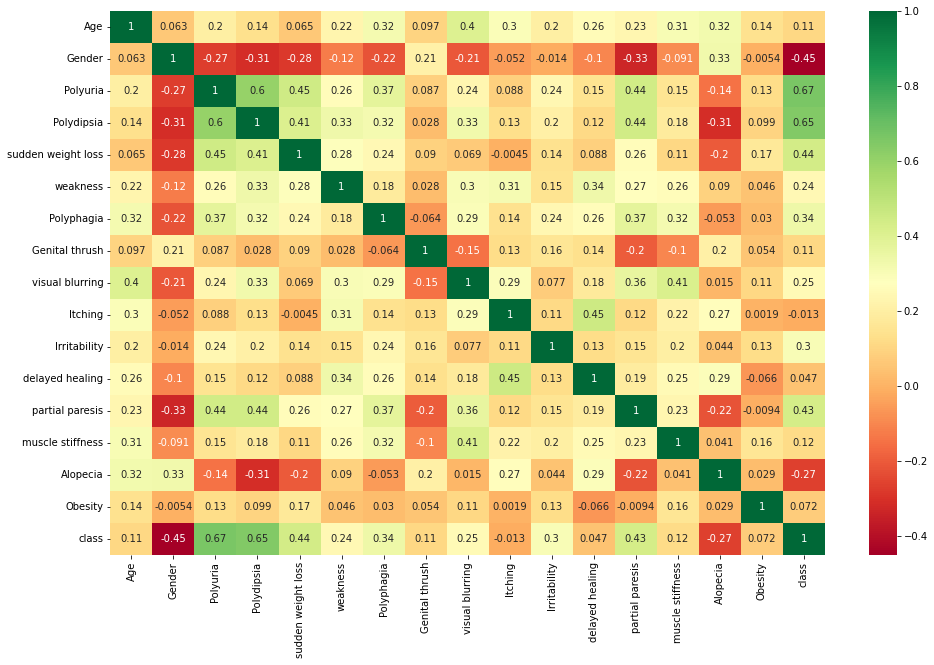

In [28]:
# plotting the correlation matrix as a heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (16,10))
sns.heatmap(correaltion_matrix, cmap="RdYlGn", annot=True)

In [33]:
# separating the target class from the dataset
x = dataset_1.drop('class', axis = 1)
y = dataset_1['class']

In [34]:
# splitting data into training and testing se
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=0)

In [35]:
# scaling x_train and x_test
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
 
x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.transform(x_test)

In [36]:
# applying PCA
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 7)
 
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [37]:
x_train.shape

(416, 7)

In [38]:
explained_variance = pca.explained_variance_ratio_
sum(explained_variance)

0.7127486315486002

# Random Forest With PCA

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 15, max_depth = 9, min_samples_split = 5) 
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=9, min_samples_split=5, n_estimators=15)

In [40]:
# accuracy for random forest 
accuracy_rf = rf.score(x_test, y_test)
accuracy_rf

0.9807692307692307

In [41]:
# makking predictions using random forest
y_pred_rf = rf.predict(x_test)

([<matplotlib.axis.YTick at 0x950f3efd0>,
 [Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')])

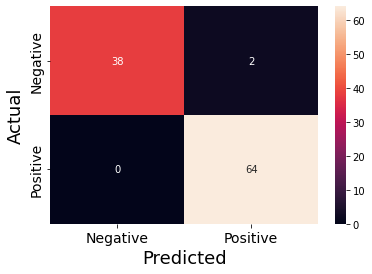

In [42]:
# generating confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot = True)
plt.xlabel("Predicted", fontsize=18)
plt.ylabel("Actual", fontsize=18)
plt.xticks([0.5,1.5], ['Negative', 'Positive'], fontsize = 14)
plt.yticks([0.5,1.5], ['Negative', 'Positive'], fontsize = 14)

In [43]:
# calculating other performance evaluation parameters
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
precision_rf = precision_score(y_test, y_pred_rf)
y_pred_prob_rf = rf.predict_proba(x_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)

In [44]:
print('Random Forest performance evalation measures: ')
print('Accuracy: ', round(accuracy_rf, 4))
print('F1 score: ', round(f1_score_rf, 4))
print('Precision: ', round(precision_rf, 4))
print('Recall: ', round(recall_rf, 4))
print('AUC: ', round(auc_rf, 4))

Random Forest performance evalation measures: 
Accuracy:  0.9808
F1 score:  0.9846
Precision:  0.9697
Recall:  1.0
AUC:  1.0


In [45]:
true_positive_rf = conf_matrix[1,1]
true_negative_rf = conf_matrix[0,0]
false_positive_rf = conf_matrix[0,1]
false_negative_rf = conf_matrix[1,0]
#print(true_positive_rf)
#print(true_negative_rf)
#print(false_positive_rf)
#print(false_negative_rf)

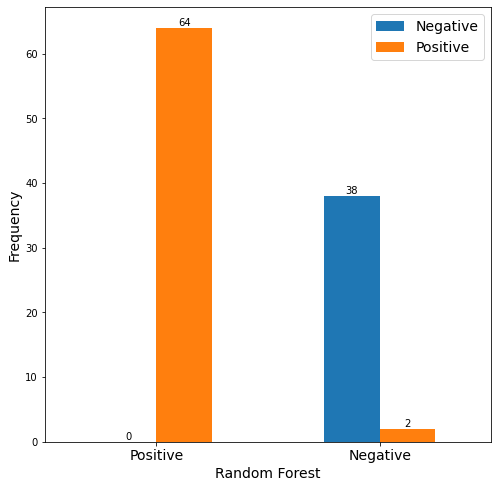

In [46]:
plot_groups = [[false_negative_rf, true_positive_rf], [true_negative_rf, false_positive_rf]]
plot_group_labels = ["Positive", "Negative"]
plot_df = pd.DataFrame(plot_groups, index = plot_group_labels)
ax = plot_df.plot(kind='bar', legend=False, width=0.5, figsize=(8,8))
ax.legend(['Negative', 'Positive'], fontsize = 14)
ax.set_ylabel('Frequency', fontsize = 14)
ax.set_xlabel('Random Forest', fontsize = 14)
ax.set_xticklabels(['Positive', 'Negative'], rotation = 0, fontsize = 14)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# Decision Tree with PCA

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier() 
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [48]:
# accuracy for decision tree 
accuracy_dt = dt.score(x_test, y_test)
accuracy_dt

0.9807692307692307

In [49]:
# making predictions using decision tree
y_pred_dt = dt.predict(x_test)

([<matplotlib.axis.YTick at 0x951662f28>,
 [Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')])

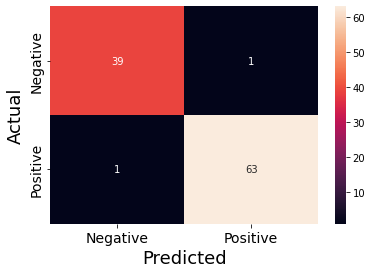

In [50]:
# generating confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix, annot = True)
plt.xlabel("Predicted", fontsize=18)
plt.ylabel("Actual", fontsize=18)
plt.xticks([0.5,1.5], ['Negative', 'Positive'], fontsize = 14)
plt.yticks([0.5,1.5], ['Negative', 'Positive'], fontsize = 14)

In [51]:
# calculating other performance evaluation parameters
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
precision_dt = precision_score(y_test, y_pred_dt)
y_pred_prob_dt = rf.predict_proba(x_test)[:,1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob_dt)
auc_dt = auc(fpr_dt, tpr_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_score_dt = f1_score(y_test, y_pred_dt)

In [52]:
print('Decision Tree performance evalation measures: ')
print('Accuracy: ', round(accuracy_dt, 4))
print('F1 score: ', round(f1_score_dt, 4))
print('Precision: ', round(precision_dt, 4))
print('Recall: ', round(recall_dt, 4))
print('AUC: ', round(auc_dt, 4))

Decision Tree performance evalation measures: 
Accuracy:  0.9808
F1 score:  0.9844
Precision:  0.9844
Recall:  0.9844
AUC:  1.0


In [53]:
true_positive_dt = conf_matrix[1,1]
true_negative_dt = conf_matrix[0,0]
false_positive_dt = conf_matrix[0,1]
false_negative_dt = conf_matrix[1,0]

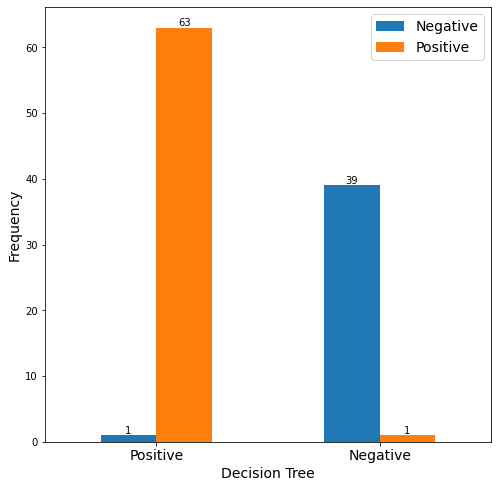

In [54]:
plot_groups = [[false_negative_dt, true_positive_dt], [true_negative_dt, false_positive_dt]]
plot_group_labels = ["Positive", "Negative"]
plot_df = pd.DataFrame(plot_groups, index = plot_group_labels)
ax = plot_df.plot(kind='bar', legend=False, width=0.5, figsize=(8,8))
ax.legend(['Negative', 'Positive'], fontsize = 14)
ax.set_ylabel('Frequency', fontsize = 14)
ax.set_xlabel('Decision Tree', fontsize = 14)
ax.set_xticklabels(['Positive', 'Negative'], rotation = 0, fontsize = 14)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# Naive Bayes with PCA

In [62]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train, y_train)

ValueError: Negative values in data passed to MultinomialNB (input X)

In [63]:
accuracy_nb = nb.score(x_test, y_test)
accuracy_nb

AttributeError: 'MultinomialNB' object has no attribute 'feature_log_prob_'

In [75]:
# making predictions using naive bayes
y_pred_nb = nb.predict(x_test)

([<matplotlib.axis.YTick at 0x1a266e39e8>,
 [Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')])

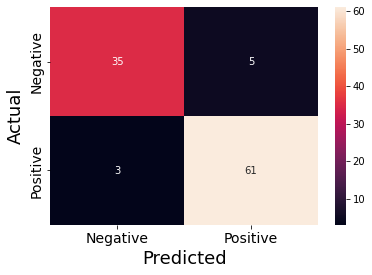

In [76]:
# generating confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(conf_matrix, annot = True)
plt.xlabel("Predicted", fontsize=18)
plt.ylabel("Actual", fontsize=18)
plt.xticks([0.5,1.5], ['Negative', 'Positive'], fontsize = 14)
plt.yticks([0.5,1.5], ['Negative', 'Positive'], fontsize = 14)

In [77]:
# calculating other performance evaluation parameters
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
precision_nb = precision_score(y_test, y_pred_nb)
y_pred_prob_nb = nb.predict_proba(x_test)[:,1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb)
auc_nb = auc(fpr_nb, tpr_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_score_nb = f1_score(y_test, y_pred_nb)

In [78]:
print('Naive Bayes performance evalation measures: ')
print('Accuracy: ', round(accuracy_nb, 4))
print('F1 score: ', round(f1_score_nb, 4))
print('Precision: ', round(precision_nb, 4))
print('Recall: ', round(recall_nb, 4))
print('AUC: ', round(auc_nb, 4))

Naive Bayes performance evalation measures: 
Accuracy:  0.9231
F1 score:  0.9385
Precision:  0.9242
Recall:  0.9531
AUC:  0.9727


In [79]:
true_positive_nb = conf_matrix[1,1]
true_negative_nb = conf_matrix[0,0]
false_positive_nb = conf_matrix[0,1]
false_negative_nb = conf_matrix[1,0]

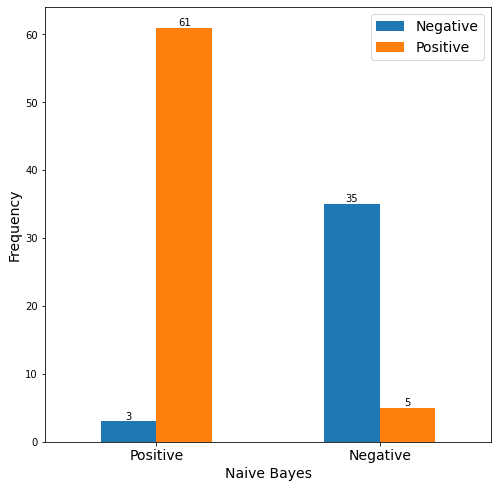

In [81]:
plot_groups = [[false_negative_nb, true_positive_nb], [true_negative_nb, false_positive_nb]]
plot_group_labels = ["Positive", "Negative"]
plot_df = pd.DataFrame(plot_groups, index = plot_group_labels)
ax = plot_df.plot(kind='bar', legend=False, width=0.5, figsize=(8,8))
ax.legend(['Negative', 'Positive'], fontsize = 14)
ax.set_ylabel('Frequency', fontsize = 14)
ax.set_xlabel('Naive Bayes', fontsize = 14)
ax.set_xticklabels(['Positive', 'Negative'], rotation = 0, fontsize = 14)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# KNN with PCA

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() # n_neighbors=4, weights='distance', metric='euclidean'
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [56]:
accuracy_knn = knn.score(x_test, y_test)
accuracy_knn

0.9519230769230769

In [57]:
# making predictions using knn
y_pred_knn = knn.predict(x_test)

([<matplotlib.axis.YTick at 0x9517a9c18>,
 [Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')])

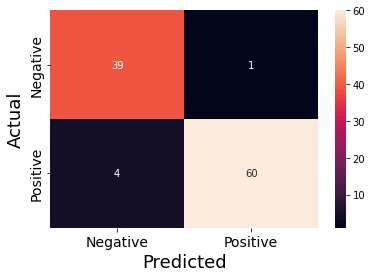

In [58]:
# generating confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix, annot = True)
plt.xlabel("Predicted", fontsize=18)
plt.ylabel("Actual", fontsize=18)
plt.xticks([0.5,1.5], ['Negative', 'Positive'], fontsize = 14)
plt.yticks([0.5,1.5], ['Negative', 'Positive'], fontsize = 14)

In [59]:
# calculating other performance evaluation parameters
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
precision_knn = precision_score(y_test, y_pred_knn)
y_pred_prob_knn = knn.predict_proba(x_test)[:,1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_prob_knn)
auc_knn = auc(fpr_knn, tpr_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_score_knn = f1_score(y_test, y_pred_knn)

In [60]:
print('KNN performance evalation measures: ')
print('Accuracy: ', round(accuracy_knn, 4))
print('F1 score: ', round(f1_score_knn, 4))
print('Precision: ', round(precision_knn, 4))
print('Recall: ', round(recall_knn, 4))
print('AUC: ', round(auc_knn, 4))

KNN performance evalation measures: 
Accuracy:  0.9519
F1 score:  0.96
Precision:  0.9836
Recall:  0.9375
AUC:  0.9967


In [61]:
true_positive_knn = conf_matrix[1,1]
true_negative_knn = conf_matrix[0,0]
false_positive_knn = conf_matrix[0,1]
false_negative_knn = conf_matrix[1,0]

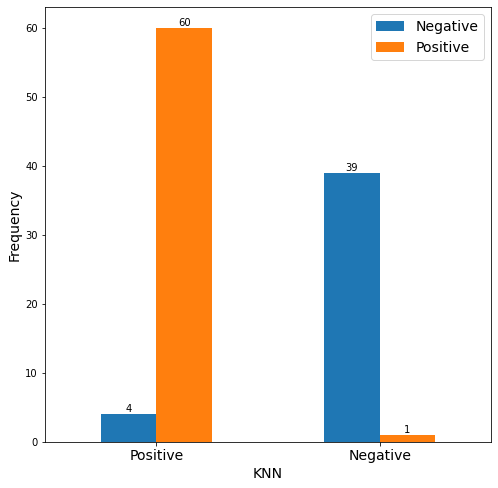

In [62]:
plot_groups = [[false_negative_knn, true_positive_knn], [true_negative_knn, false_positive_knn]]
plot_group_labels = ["Positive", "Negative"]
plot_df = pd.DataFrame(plot_groups, index = plot_group_labels)
ax = plot_df.plot(kind='bar', legend=False, width=0.5, figsize=(8,8))
ax.legend(['Negative', 'Positive'], fontsize = 14)
ax.set_ylabel('Frequency', fontsize = 14)
ax.set_xlabel('KNN', fontsize = 14)
ax.set_xticklabels(['Positive', 'Negative'], rotation = 0, fontsize = 14)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# Logistic Regression with PCA

In [55]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=107, C = 0.9)
log_reg.fit(x_train, y_train)
# max_iter

LogisticRegression(C=0.9, max_iter=107)

In [56]:
accuracy_log_reg = log_reg.score(x_test, y_test)
accuracy_log_reg

0.9230769230769231

In [57]:
# making predictions using logistic regression
y_pred_log_reg = log_reg.predict(x_test)

([<matplotlib.axis.YTick at 0x412bd6898>,
 [Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')])

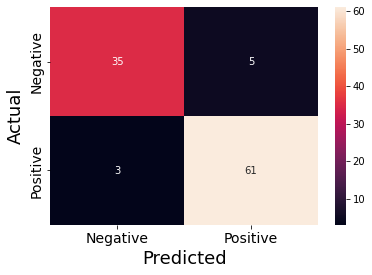

In [58]:
# generating confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(conf_matrix, annot = True)
plt.xlabel("Predicted", fontsize=18)
plt.ylabel("Actual", fontsize=18)
plt.xticks([0.5,1.5], ['Negative', 'Positive'], fontsize = 14)
plt.yticks([0.5,1.5], ['Negative', 'Positive'], fontsize = 14)

In [59]:
# calculating other performance evaluation parameters
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
precision_log_reg = precision_score(y_test, y_pred_log_reg)
y_pred_prob_log_reg = log_reg.predict_proba(x_test)[:,1]
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_pred_prob_log_reg)
auc_log_reg = auc(fpr_log_reg, tpr_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_score_log_reg = f1_score(y_test, y_pred_log_reg)

In [60]:
print('Logistic Regression performance evalation measures: ')
print('Accuracy: ', round(accuracy_log_reg, 4))
print('F1 score: ', round(f1_score_log_reg, 4))
print('Precision: ', round(precision_log_reg, 4))
print('Recall: ', round(recall_log_reg, 4))
print('AUC: ', round(auc_log_reg, 4))

Logistic Regression performance evalation measures: 
Accuracy:  0.9231
F1 score:  0.9385
Precision:  0.9242
Recall:  0.9531
AUC:  0.9723


In [61]:
true_positive_log_reg = conf_matrix[1,1]
true_negative_log_reg = conf_matrix[0,0]
false_positive_log_reg = conf_matrix[0,1]
false_negative_log_reg = conf_matrix[1,0]

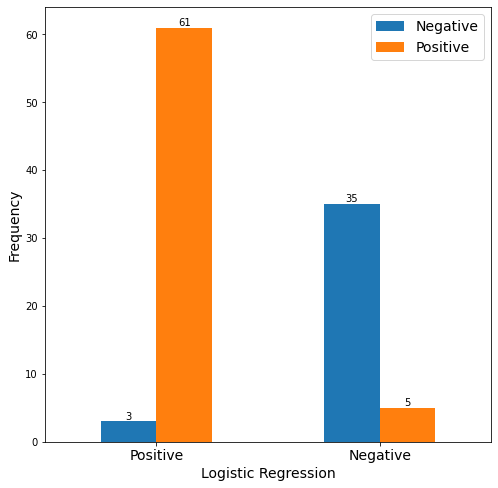

In [62]:
plot_groups = [[false_negative_log_reg, true_positive_log_reg], [true_negative_log_reg, false_positive_log_reg]]
plot_group_labels = ["Positive", "Negative"]
plot_df = pd.DataFrame(plot_groups, index = plot_group_labels)
ax = plot_df.plot(kind='bar', legend=False, width=0.5, figsize=(8,8))
ax.legend(['Negative', 'Positive'], fontsize = 14)
ax.set_ylabel('Frequency', fontsize = 14)
ax.set_xlabel('Logistic Regression', fontsize = 14)
ax.set_xticklabels(['Positive', 'Negative'], rotation = 0, fontsize = 14)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# Gradient Boosting with PCA

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [64]:
accuracy_gbc = gbc.score(x_test, y_test)
accuracy_gbc

0.9903846153846154

In [65]:
# making predictions using gradient boosting
y_pred_gbc = gbc.predict(x_test)

([<matplotlib.axis.YTick at 0x412b0efd0>,
 [Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')])

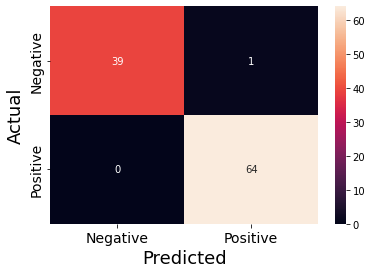

In [66]:
# generating confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_gbc)
sns.heatmap(conf_matrix, annot = True)
plt.xlabel("Predicted", fontsize=18)
plt.ylabel("Actual", fontsize=18)
plt.xticks([0.5,1.5], ['Negative', 'Positive'], fontsize = 14)
plt.yticks([0.5,1.5], ['Negative', 'Positive'], fontsize = 14)

In [67]:
# calculating other performance evaluation parameters
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
precision_gbc = precision_score(y_test, y_pred_gbc)
y_pred_prob_gbc = gbc.predict_proba(x_test)[:,1]
fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(y_test, y_pred_prob_gbc)
auc_gbc = auc(fpr_gbc, tpr_gbc)
recall_gbc = recall_score(y_test, y_pred_gbc)
f1_score_gbc = f1_score(y_test, y_pred_gbc)

In [68]:
print('Gradient Boosting performance evalation measures: ')
print('Accuracy: ', round(accuracy_gbc, 4))
print('F1 score: ', round(f1_score_gbc, 4))
print('Precision: ', round(precision_gbc, 4))
print('Recall: ', round(recall_gbc, 4))
print('AUC: ', round(auc_gbc, 4))

Gradient Boosting performance evalation measures: 
Accuracy:  0.9904
F1 score:  0.9922
Precision:  0.9846
Recall:  1.0
AUC:  1.0


In [69]:
true_positive_gbc = conf_matrix[1,1]
true_negative_gbc = conf_matrix[0,0]
false_positive_gbc = conf_matrix[0,1]
false_negative_gbc = conf_matrix[1,0]

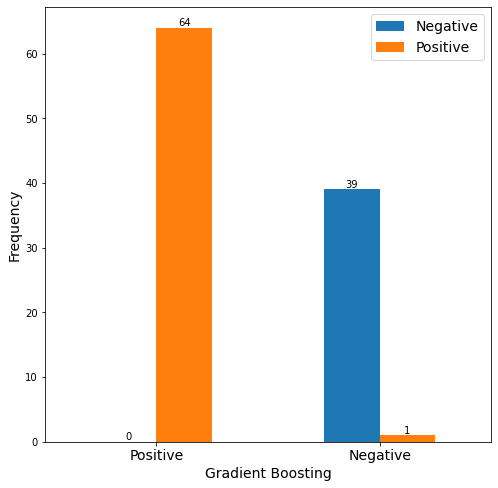

In [70]:
plot_groups = [[false_negative_gbc, true_positive_gbc], [true_negative_gbc, false_positive_gbc]]
plot_group_labels = ["Positive", "Negative"]
plot_df = pd.DataFrame(plot_groups, index = plot_group_labels)
ax = plot_df.plot(kind='bar', legend=False, width=0.5, figsize=(8,8))
ax.legend(['Negative', 'Positive'], fontsize = 14)
ax.set_ylabel('Frequency', fontsize = 14)
ax.set_xlabel('Gradient Boosting', fontsize = 14)
ax.set_xticklabels(['Positive', 'Negative'], rotation = 0, fontsize = 14)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# SVM with PCA

In [71]:
from sklearn.svm import SVC
svm = SVC(kernel='poly', coef0=1.1, tol=0.001, gamma=0.05)
svm.fit(x_train, y_train)

SVC(coef0=1.1, gamma=0.05, kernel='poly')

In [72]:
accuracy_svm = svm.score(x_test, y_test)
accuracy_svm

0.9519230769230769

In [73]:
# making predictions using SVM
y_pred_svm = svm.predict(x_test)

([<matplotlib.axis.YTick at 0x41106fe80>,
 [Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')])

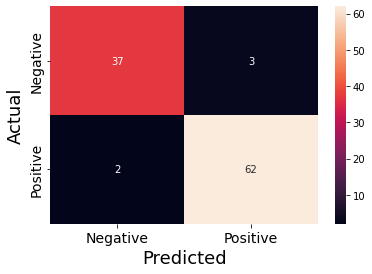

In [74]:
# generating confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix, annot = True)
plt.xlabel("Predicted", fontsize=18)
plt.ylabel("Actual", fontsize=18)
plt.xticks([0.5,1.5], ['Negative', 'Positive'], fontsize = 14)
plt.yticks([0.5,1.5], ['Negative', 'Positive'], fontsize = 14)

In [75]:
# calculating other performance evaluation parameters
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
precision_svm = precision_score(y_test, y_pred_svm)
y_pred_prob_svm = gbc.predict_proba(x_test)[:,1]
fpr_svm, tpr_svm, thresholds_gbc = roc_curve(y_test, y_pred_prob_svm)
auc_svm = auc(fpr_svm, tpr_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_score_svm = f1_score(y_test, y_pred_svm)

In [76]:
print('SVM performance evalation measures: ')
print('Accuracy: ', round(accuracy_svm, 4))
print('F1 score: ', round(f1_score_svm, 4))
print('Precision: ', round(precision_svm, 4))
print('Recall: ', round(recall_svm, 4))
print('AUC: ', round(auc_svm, 4))

SVM performance evalation measures: 
Accuracy:  0.9519
F1 score:  0.9612
Precision:  0.9538
Recall:  0.9688
AUC:  1.0


In [77]:
true_positive_svm = conf_matrix[1,1]
true_negative_svm = conf_matrix[0,0]
false_positive_svm = conf_matrix[0,1]
false_negative_svm = conf_matrix[1,0]

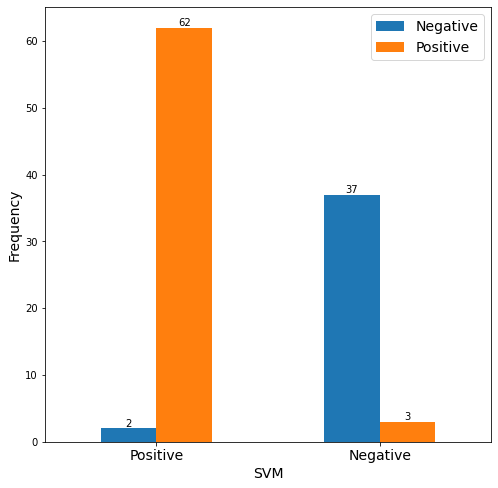

In [78]:
plot_groups = [[false_negative_svm, true_positive_svm], [true_negative_svm, false_positive_svm]]
plot_group_labels = ["Positive", "Negative"]
plot_df = pd.DataFrame(plot_groups, index = plot_group_labels)
ax = plot_df.plot(kind='bar', legend=False, width=0.5, figsize=(8,8))
ax.legend(['Negative', 'Positive'], fontsize = 14)
ax.set_ylabel('Frequency', fontsize = 14)
ax.set_xlabel('SVM', fontsize = 14)
ax.set_xticklabels(['Positive', 'Negative'], rotation = 0, fontsize = 14)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

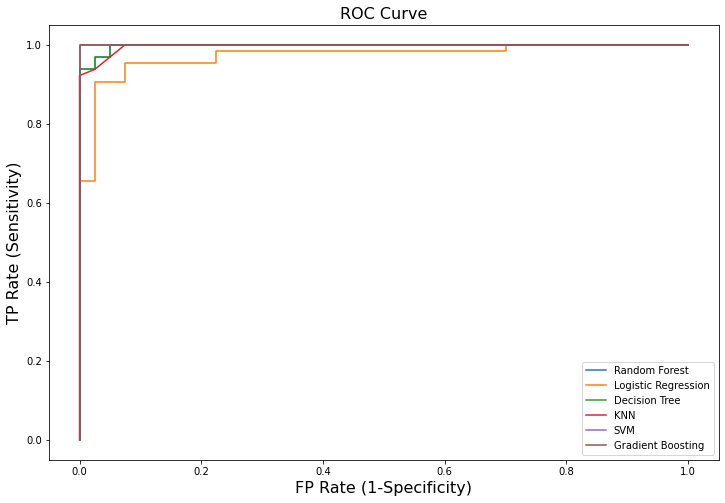

In [79]:
# Plotting ROC curve
plt.figure(figsize = (12,8))
plt.plot(fpr_rf,tpr_rf,label="Random Forest")
plt.plot(fpr_log_reg,tpr_log_reg,label="Logistic Regression")
plt.plot(fpr_dt,tpr_dt,label="Decision Tree")
plt.plot(fpr_knn,tpr_knn,label="KNN")
plt.plot(fpr_svm,tpr_svm,label="SVM")
plt.plot(fpr_gbc,tpr_gbc,label="Gradient Boosting")
#plt.plot(fpr_nb,tpr_nb,label="Naive Bayes")
plt.xlabel('FP Rate (1-Specificity)', fontsize=16)
plt.ylabel('TP Rate (Sensitivity)', fontsize=16)
plt.title('ROC Curve', fontsize=16)
plt.legend()

[Text(0, 0, '0.981'),
 Text(0, 0, '0.962'),
 Text(0, 0, '0.952'),
 Text(0, 0, '0.923'),
 Text(0, 0, '0.99'),
 Text(0, 0, '0.952')]

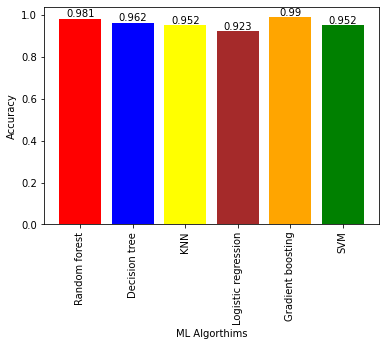

In [81]:
# plotting all the accuracy of algorithm in a bar plot 
import numpy as np
x_index = np.arange(6)
y = [round(accuracy_rf,3), round(accuracy_dt,3), round(accuracy_knn,3), round(accuracy_log_reg,3), 
     round(accuracy_gbc,3), round(accuracy_svm,3)]
algo = ['Random forest', 'Decision tree', 'KNN', 'Logistic regression', 'Gradient boosting', 'SVM']
fig, ax = plt.subplots()
ax.set_xticks(x_index, labels = algo, rotation = 90)
bars = ax.bar(x_index, y, color=['red', 'blue', 'yellow', 'brown', 'orange', 'green'])
ax.set_ylabel('Accuracy')
ax.set_xlabel('ML Algorthims')
ax.bar_label(bars)